<a href="https://colab.research.google.com/github/paolofesta/prove/blob/master/scrittura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Scelta dell’oggetto di studio**
La scelta di utilizzare Twitter, raccogliendo tweet da analizzare, è nata da una riflessione svolta con il relatore; dal momento che questo tipo di analisi non era ancora stata affrontata nel mio percorso di studi, l’interesse verso questo tipo di ricerca era elevato, proprio come l’impegno richiesto. Prima ancora di decidere il target della ricerca, era indispensabile conoscere i meccanismi di raccolta dei tweet, per capire cosa si potesse ottenere. In quest’ottica è stato fondamentale il Twitter Developer Portal, tramite esso è stato creato un developer account con accesso elevato, in quanto l’accesso standard comportava limiti eccessivi. Tramite la Dashboard del Developer Portal si poteva avere accesso ai propri progetti e alle proprie app, strumenti essenziali per ottenere accesso alle API di Twitter e quindi per raccogliere i tweet. Queste informazioni e molte altre sono consultabili nella sezione Docs del portale, che si è rivelata strumento utilissimo non solo in questa fase iniziale ma per tutta la durata del progetto. Una volta compreso cosa effettivamente si poteva raccogliere, la concentrazione si è focalizzata sulla scelta dell’oggetto di studio vero e proprio. La scelta è ricaduta sull’analisi dei tweet citanti le tre maggiori sigle sindacali italiane: Cgil, Cisl e Uil. I motivi sono molteplici: Il mutamento del ruolo dei sindacati e la crisi dei tassi di sindacalizzazione è stato un fenomeno riscontrato più volte durante il percorso di studi, suscitando molto interesse; inoltre, in questo modo è stato possibile raccogliere un buon numero di tweets, circa tredicimila, condizione essenziale per poter fare un’analisi valida. L’intento era quello di svolgere una Sentiment Analysis dei tweets raccolti, ovvero identificare sentimenti ed emozioni associati ai tweets, non fermandosi ai dati generali ma andando alla ricerca di variabili in grado di cambiare questa associazione. 
### **Scelta del linguaggio di programmazione**
Le due opzioni prese in considerazione erano Python e R studio, entrambi i linguaggi di programmazione sono stati appresi durante il percorso di studi e sono da considerare come validi strumenti. La scelta è ricaduta su Python per diverse ragioni: innanzitutto, la maggiore diffusione, che porta ad una maggiore quantità di documentazione e ad una più ampia community di utilizzatori, molto utile per risolvere problemi e ricevere chiarimenti; inoltre, perché permette di utilizzare Google Colab, strumento molto comodo e versatile che permette di usare Python dal proprio browser. Per concludere, Python è stato indicato come primo nella top ten dei linguaggi di programmazione più popolari da imparare nel 2020 secondo la Northeastern Univeristy. 

### **Librerie utilizzate**
NumPy è una libreria essenziale di Python, utilizzata per gestire le matrici numeriche (arrays); Pandas è invece una libreria costruita sulla base di quella precedente, che permette di gestire i dataframe, ovvero degli arrays multidimensionali in forma tabellare. Tweepy, permette di avere accesso alle API di twitter per raccogliere diverse tipologie di dati, esistono altre librerie simili, questa è però tra le più utilizzate, essendo indicata anche all’interno del Twitter Developer Portal. re e gensim sono librerie utilizzate per il topic modelling, cioè per processare il testo dei tweet prima di poter iniziare con la sentiment analisys. feel_it è una libreria tramite la quale si può utilizzare un modello che, attraverso un corpus di tweet classificati in base a quattro emozioni basiche(rabbia, paura, gioia, tristezza), permette di inferire sentimenti ed emozioni da tweet in lingua italiana. Infine, matplotlib.pyplot e seaborn, sono librerie utilizzate a fini di visualizzazione, per produrre word clouds e grafici.





In [27]:
import numpy as np
import pandas as pd
import tweepy
import re
import gensim
import fell-it
import matplotlib.pyplot as plt
import seaborn as sns

### **Accesso alle API di Twitter**
Tramite la seguente funzione, è stato possibile connettere l'ambiente di lavoro con il Developer account, inserendo le diverse password fornite dal Developer Portal; questo aspetto è stato indispensabile per poter interagire con le API di Twitter.

In [ ]:
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    api = tweepy.API(auth, wait_on_rate_limit=True ,wait_on_rate_limit_notify=True)
    return api
    
api = connect_to_twitter_OAuth()

### **Scraping**
Sono stati raccolti 13 365 tweets nel cui testo venivano citati i profili delle tre maggiori sigle sindacali italiane: @cgilnazionale, @CislNazionale,@UILofficial. Durante questa fase è stata essenziale la consultazione del Developer Portal di Twitter. Le limitazioni nella raccolta di tweet imposte sono infatti molto stringenti: impongono l'obbligo di poter raccogliere esclusivamente i tweet prodotti nei sette giorni precedenti alla richiesta; a meno che non si voglia raccogliere solo i tweet di uno specifico utente, in questo caso si può raccogliere un massimo di 3000 tweets. Le limitazioni non si limitano solo alle sopracitate, esistono anche dei limiti riguardo al numero di tweet raccoglibili in un dato periodo di tempo, per questo è stato necessario utilizzare una funzione in grado di gestirle. La prima funzione riportata di seguito è stata utilizzata per la gestione delle limitazioni. 






In [ ]:
def limit_handled(cursor):
  while True:
    try:
      yield cursor.next()
    except StopIteration:
      return
    except tweepy.RateLimitError:
        time.sleep(15*60)

La seguente per la raccolta degli attributi dei tweet.


In [ ]:

def extract_tweet_attributes(tweet_object):
    tweet_list =[]
    for tweet in tweet_object:
        tweet_id = tweet.id 
        language= tweet.lang 
        name= tweet.user.name     
        location= tweet.user.location
        follower_count= tweet.user.followers_count
        verified= tweet.user.verified
        text = tweet.full_text 
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        created_at = tweet.created_at 
        source = tweet.source 
       
       
        tweet_list.append({'tweet_id':tweet_id,
                           'language':language,
                          'text':text,
                          'name':name,
                          'location':location,
                          'follower_count':follower_count,
                          'verified': verified,
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                          'created_at':created_at, 
                          'source':source,})

     
    df1 = pd.DataFrame(tweet_list, columns=['tweet_id',
                                           'text',
                                           'language',
                                           'name',
                                           'follower_count',
                                           'verified',
                                           'location',    
                                           'favorite_count',
                                           'retweet_count',
                                           'created_at',
                                           'source'])
    return df1


df1 = extract_tweet_attributes(pp1)


Il numero di tweet si è poi ridotto da 13 365 a 12 560, eliminando i tweet incompatibili con la ricerca; la raccolta è avvenuta in due momenti: in data 12/5/2022 sono stati raccolti i tweet prodotti dal 6/5 al 12/5, In data 23/7/2022 sono stati raccolti i tweet prodotti dal 17/7 al 23/7, per via dei suddetti limiti. Per ogni tweet sono stati raccolti i seguenti attributi: 
*   L’ID del tweet
*   La lingua in cui è stato scritto
*   Il testo del tweet
*   Il nome dell’utente che l’ha prodotto
*   La location( qualora indicata)
*   Il numero di follower dell’utente 
*   Lo status di verificato o meno dell’utente 
*   Il numero di favourites del tweet
*   Il numero di retweet
*   L’orario in cui è stato creato 
*   La fonte


In [35]:
#@title 
data=pd.read_csv(r'/content/data (1)').drop("Unnamed: 0",axis=1)
data.drop("sigla",axis=1)

,tweet_id,text,language,name,follower_count,verified,location,favorite_count,retweet_count,created_at,source
0,1524830657712640010,RT @kastatrof: Imaginez.. à qq heures de route...,fr,Gandalf,125,False,NaN,0,7,2022-05-12 19:15:33,Twitter for Android
1,1524824670125625345,@cgilnazionale Sembra una supercazzola... prem...,it,Patsy 🇮🇹,36,False,NaN,1,0,2022-05-12 18:51:45,Twitter for Android
2,1524809559851814912,RT @kastatrof: Imaginez.. à qq heures de route...,fr,ivy,498,False,NaN,0,7,2022-05-12 17:51:43,Twitter for Android
3,1524804096439492612,🟥SOLO LA PACE\n@cgilnazionale partecipa all'ac...,it,FLC CGIL Roma Lazio,1238,False,"Roma, Via Buonarroti 12",0,0,2022-05-12 17:30:00,Twitter Web App
4,1524802721789972485,@fpcgil_internaz @fbunational @FpCgilVVF @EPSU...,und,Sven De Guise,281,False,Gelrode,1,0,2022-05-12 17:24:32,Twitter Web App
...,...,...,...,...,...,...,...,...,...,...,...
13360,1549297798784458760,@paolo_r_2012 @INL_gov @AndreaOrlandosp @MinLa...,es,Sandra Zampa,12191,False,NaN,1,1,2022-07-19 07:39:14,Twitter for iPhone
13361,1549296792193441792,RT @UILofficial: La crisi di Governo è un grav...,it,Uiltec Calabria,97,False,"Lamezia Terme, Calabria",0,16,2022-07-19 07:35:14,Twitter for iPhone
13362,1549268625386766344,"RT @emalombardini: #crisidigoverno , appello a...",it,Loris Cavalletti,914,False,NaN,0,3,2022-07-19 05:43:18,Twitter for iPhone
13363,1549261964307734533,RT @UILofficial: La crisi di Governo è un grav...,it,Felice Alfonsi,657,False,NaN,0,16,2022-07-19 05:16:50,Twitter for iPhone


### **Analisi preliminare**
Si è proceduto a creare una variabile, denominata “sigla”, che indicasse a quale sindacato faceva riferimento il tweet; tramite un grafico a barre si è osservato che i tweet si dividono come segue: una percentuale del 66-68% dei tweet fa riferimento al sindacato Cisl, segue Cgil con una percentuale poco sotto al 30%, Uil è ultimo con una percentuale vicina al 5%. Questi dati sono in linea con l’attività dei profili dei sindacati su Twitter; infatti, @CislNazionale è in testa con più di 100.000 tweets prodotti, @cgilnazionale segue a quota 50.000 e ,@UILofficial ne ha prodotti circa 12.000. Osservando invece le dimensioni dei profili, il primo è @cgilnazionale con più di 80.000 followers, seguito da @CislNazionale a 30.600 e @UILofficial a 12.500.                                                                                                                   

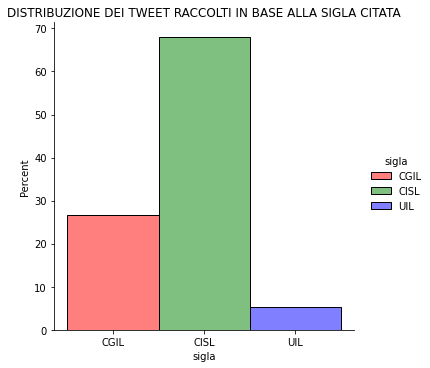

In [ ]:
#@title 
sns.displot(data,x="sigla",stat="percent",hue="sigla",palette=['r','g','b'])
plt.title('DISTRIBUZIONE DEI TWEET RACCOLTI IN BASE ALLA SIGLA CITATA')
print()


 Successivamente, attraverso apposite funzioni, è stata creata una variabile denominata “cleaned text”, contenete il testo dei tweet pre-processato. La pulizia del testo dei tweet è servita per l’utilizzo di "FEEL-IT: Emotion and Sentiment Classification for the Italian Language", modello pubblicato dall’Association for Computational Linguistics nel 2021. Tramite questo modello è stato possibile produrre due variabili: la variabile “sentiment”, indicante il sentimento espresso dal tweet, diviso in “positive” o “negative”; la variabile “emotion”, indicante l’emozione espressa dal tweet, divisa in “anger”,”fear”,”sadness”,”joy”.
Una volta ottenuti questi dati, è stata svolta un’analisi generale. Tramite un grafico a barre si è osservato che la distribuzione dei sentimenti è composta come segue: circa il 70% dei tweet è associato al valore “negative”, mentre solo il 30% ha valore “positive”. Lo stesso quadro si palesa anche osservando la distribuzione delle emozioni: considerando “joy” come emozione positiva e aggregando le altre tre come negative si ritrova una percentuale molto simile a quella del precedente grafico. Si può quindi affermare che quando si producono tweet citando un sindacato, la  tendenza sia quella di produrre tweet negativi. I motivi possono essere molteplici: insoddisfazione riguardo all’operato del sindacato, insoddisfazione legata a fattori esterni al sindacato o che lo riguardano indirettamente, oppure, questa tendenza potrebbe derivare dal tono con cui ci si esprime su Twitter. 
